<a href="https://colab.research.google.com/github/Etriuus/Evaluacion2_parte2/blob/main/Daniel_Matias_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 2



---



**Autor:**

**Daniel Baldebenito**

**Matias Cartes**

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 3 de la asignatura de Inteligencia Artificial de la Universidad del Bío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv

--2025-06-06 23:39:03--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402467 (393K) [text/plain]
Saving to: ‘dataset_churn_2025.csv.5’

dataset_churn_2025. 100%[===================>] 393.03K  --.-KB/s    in 0.03s   

2025-06-06 23:39:03 (11.9 MB/s) - ‘dataset_churn_2025.csv.5’ saved [402467/402467]



# Descripción de la data

+ `age` - Edad del cliente (18 a 75 años)
+ `months_active` - Meses de suscripción activa
+ `monthly_spend` - Gasto mensuales en dólares
+ `support_calls` - Número de llamadas al soporte
+ `contract_type` - Tipo de contrato: `mes_a_mes`, `1_ano`, `2_anos`
+ `has_discount` - Tiene descuento activo (1 = sí, 0 = no)
+ `churm` - Variable objetivo: 1 = abandonó, 0 = NO abandonó

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("dataset_churn_2025.csv")
data.head()

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
0,56,15,181.55,2,mes_a_mes,1,0
1,69,57,182.60,4,1_ano,0,0
2,46,58,109.54,1,1_ano,1,0
3,32,35,125.52,4,mes_a_mes,1,1
4,60,24,199.34,4,mes_a_mes,1,1


In [ ]:
# Revisamos datos nulos y los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15000 non-null  int64  
 1   months_active  15000 non-null  int64  
 2   monthly_spend  15000 non-null  float64
 3   support_calls  15000 non-null  int64  
 4   contract_type  15000 non-null  object 
 5   has_discount   15000 non-null  int64  
 6   churn          15000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 820.4+ KB


In [ ]:
# Vemos la distrubucin de clases
data.groupby("churn").size()

,0
churn,
0,9988
1,5012


In [ ]:
# modificamos las columnas segun la variable objetivo
df = data

Obj = ['contract_type']

for feature in Obj:
    mean_encoded = df.groupby(feature)['churn'].mean()
    df[feature] = df[feature].map(mean_encoded)
df.head()

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
0,56,15,181.55,2,0.543795,1,0
1,69,57,182.60,4,0.019603,0,0
2,46,58,109.54,1,0.019603,1,0
3,32,35,125.52,4,0.543795,1,1
4,60,24,199.34,4,0.543795,1,1


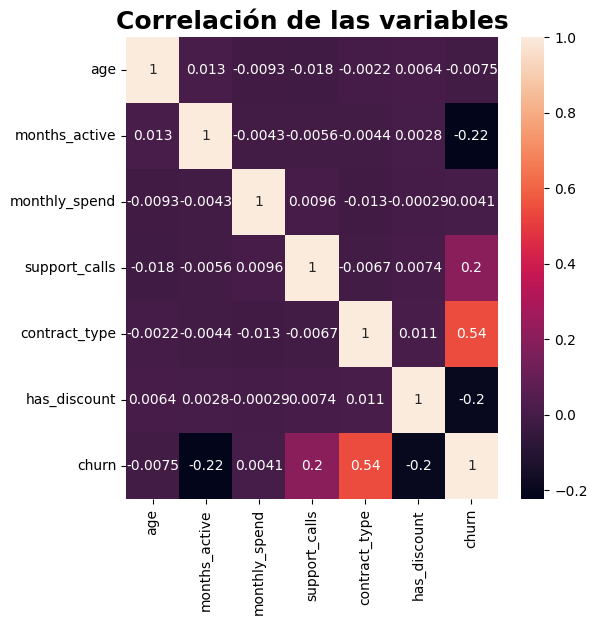

In [ ]:
# Hacemos mapa de calor para ver las correlaciones de las columnas
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()

In [ ]:
# Vemos correlaciones solo con churn
corr_matrix = df[df.describe().columns].corr()
corr_matrix["churn"].sort_values(ascending=False)

,churn
churn,1.000000
contract_type,0.543264
support_calls,0.200268
monthly_spend,0.004057
age,-0.007458
has_discount,-0.199226
months_active,-0.223644


In [ ]:
# Eliminamos las columans que tienen un impacto menor para obtener mayor precicion
df = df.drop(columns=['age', 'monthly_spend'])
df.head()

,months_active,support_calls,contract_type,has_discount,churn
0,15,2,0.543795,1,0
1,57,4,0.019603,0,0
2,58,1,0.019603,1,0
3,35,4,0.543795,1,1
4,24,4,0.543795,1,1


# Fase 4 - Modelamiento

## Modelo de clasificación

### Distribución de variable objetivo. (1 punto)

In [ ]:
# Escriba su código acá

### Selección de variables independientes (1 punto)

In [ ]:
# Escriba su código acá

### Separación datos entrenamiento y test (1 punto)

In [ ]:
# Escriba su código acá

### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo (1 punto)

In [ ]:
# Escriba su código acá

#### Entrenamiento del modelo (1 punto)

In [ ]:
# Escriba su código acá

#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

##### Accuracy (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

### Algoritmo 2 - Naive Bayes

#### Creación del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Entrenamiento del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Evaluación del modelo - (1 punto)

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

### Algoritmo 3 - Regresión Logística

#### Creación del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Entrenamiento del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Evaluación del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

### Algoritmo 4 - RandomForest

#### Creación del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Entrenamiento del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Evaluación del modelo - (1 punto)

In [ ]:
# Escriba su código acá

#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [ ]:
# Escriba su código acá

### Comparación de los modelos - (2 puntos)

In [ ]:
# Escriba su código acá